<a href="https://colab.research.google.com/github/kaloper/kaloper.github.io/blob/master/KALOPER_Geog172_finaleport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visual Exporation - State Level

##Install Libraries



In [ ]:
!pip install geopandas shapely fiona pyproj rtree contextily mapclassify pysal
import fiona 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import contextily as cx
from shapely.geometry import box
from pysal.lib import weights 
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran, Moran_Local
from splot.esda import plot_local_autocorrelation
from splot.esda import plot_moran
from libpysal.weights import Queen, KNN
!pip install geopandas rtree fiona shapely pysal seaborn 
!pip install seaborn pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pingouin as pg
from pingouin import ttest
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy

##Add Data

In [ ]:
data=pd.read_excel('/content/USACOUNTIES.xlsx')

##At least one summary table (crosstab table). This can be the table that you would use for plotting. For instance aggregate statistic (mean, sum, etc.) per state that you will be using to create a choropleth map.

In [ ]:
data['COUNTY']=data['COUNTY'].astype('string')
data['STATE_ABBR']=data['COUNTY'].str[-2:]

In [ ]:
data=data.dropna()
data= data.loc[
                            (data.STATE_ABBR != "AK") &
                            (data.STATE_ABBR != "HI") &
                            (data.STATE_ABBR != "DC")
                            ]


In [ ]:
state=data.groupby('STATE_ABBR').mean().reset_index()
state.head()

,STATE_ABBR,"Prevalence of supermarkets, grocery stores, and produce stands (NAICS codes 445110 and 445230) per 10,000 residents.",Percentage of the population that did not have access to a reliable source of food during the past year.,Percentage of adults age 20 and over reporting no leisuren/atime physical activity.,Percentage of adults 18 and older who have ever been told by a doctor that they have diabetes.,Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.,Median Personal Earnings ($),Gini Coefficient of Income Inequality 0 (complete equality) to 1 (complete inequality).,Median Household Income ($),Completed at Least Bachelor's Degree (% of adults ages 25 and older)
0,AL,1.890414,18.765152,29.953030,15.406061,35.974242,25971.848485,0.465003,38237.257576,16.746970
1,AR,2.207675,19.754667,33.870667,13.308000,35.898667,24277.733333,0.456053,36626.480000,15.034667
2,AZ,1.316077,17.640000,22.520000,11.093333,28.773333,25460.733333,0.445280,43252.200000,19.006667
3,CA,1.324581,14.662069,17.812069,8.774138,24.131034,28950.051724,0.458226,56013.155172,25.698276
4,CO,2.451314,12.781034,16.598276,6.410345,20.558621,28716.672414,0.440359,52302.051724,30.387931


##At least two scatter plots or bar charts or pie charts or time series plot (or any other type of a plot)

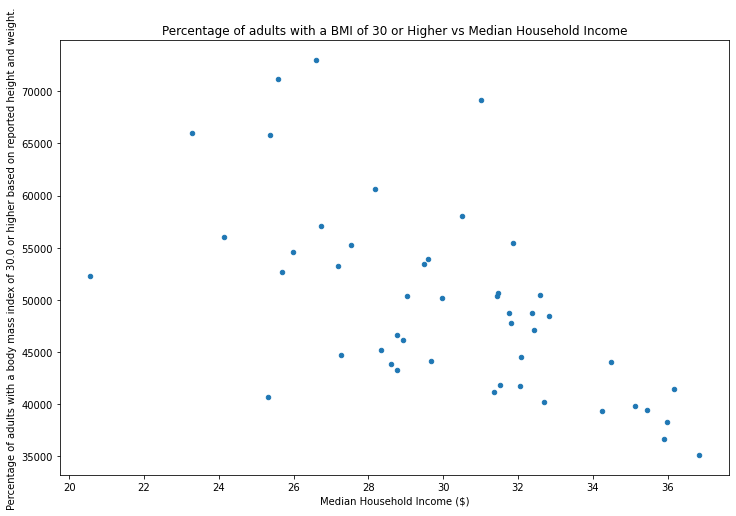

In [ ]:
state.plot('Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.','Median Household Income ($)',kind='scatter', figsize=(12,8));
plt.title('Percentage of adults with a BMI of 30 or Higher vs Median Household Income')
plt.xlabel('Median Household Income ($)')
plt.ylabel('Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.');

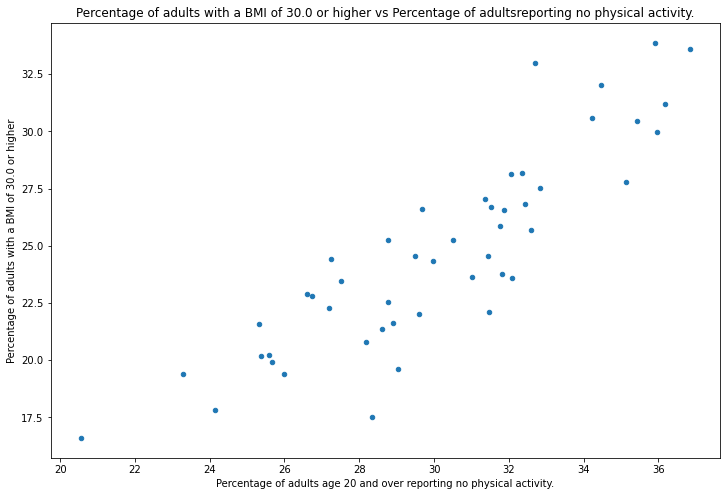

In [ ]:
state.plot('Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.',"Percentage of adults age 20 and over reporting no leisuren/atime physical activity.",kind='scatter', figsize=(12,8));
plt.title('Percentage of adults with a BMI of 30.0 or higher vs Percentage of adultsreporting no physical activity.')
plt.xlabel('Percentage of adults age 20 and over reporting no physical activity.')
plt.ylabel('Percentage of adults with a BMI of 30.0 or higher');

### Plot Interpretations
*   Median household income and the percentage of adults with a BMI of 30 or higher appear to have a negative linear correlation
*   As the median household income increases, the percentage of adults with a BMI of 30 or higher decreases
*   The percentage of adults reporting no leisure time or physical activity and the percentage of adults with a BMI of 30 or higher appear to have a positive linear correlation
*   As thepercentage of adults reporting no leisure time or physical activity increases, the percentage of adults with a BMI of 30 or higher also increases


# Statistical Tests - State Level

##At least one one sample t/z-test


In [ ]:
state["Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight."].mean()

30.0938581919465

In [ ]:
stats.ttest_1samp(state["Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight."].dropna(),popmean=30.0938581919465)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

### One Sample T Test Interpretation


*   The null hypothesis is that the sample mean percentage of adults with a body mass index of 30.0 or higher is equal to the population mean, or that the sample mean is equal to 30.0938581919465
*   The alternative hypothesis is that the sample mean percentage of adults with a BMI of 30 or higher is not equal to the population mean of 30.0938581919465
*   With a p value of 1.0 at a=0.05 there is not enough evidence to reject the null hypothesis that the sample mean does not equal the poulation mean.
*   We are 95% confident that the sample mean percentage of adults with a body mass index of 30.0 or higher is equal to the population mean


##At least one ANOVA test

In [ ]:
data.anova(dv='Median Household Income ($)', between="STATE_ABBR", detailed=True, effsize='n2')

,Source,SS,DF,MS,F,p-unc,n2
0,STATE_ABBR,1.324348e+11,47,2.817761e+09,27.024176,9.166192e-193,0.297237
1,Within,3.131173e+11,3003,1.042682e+08,NaN,NaN,NaN


In [ ]:
data.anova(dv='Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.', between="STATE_ABBR", detailed=True, effsize='n2')

,Source,SS,DF,MS,F,p-unc,n2
0,STATE_ABBR,31248.828322,47,664.868688,65.292006,0.0,0.505412
1,Within,30579.557702,3003,10.183003,NaN,NaN,NaN


### ANOVA test interpretation for USA Median Household Income
*   Null hypothesis is that the median household income is the same for all states
*   Alternative hypothesis is thatthe median household income is not the same for all states
*   F statistic is 27.024176 and p value is 9.166192e-193
*   Because the F statstic is far greater than 1, we have evidence against the null hypothesis
*   Because the p value is 9.166192e-193 we have enough evidence to reject the null hypothesis at a=0.05. 
*   We are 95% confident that the mean household income between states is different 

### ANOVA test interpretation for USA Obesity
*   Null hypothesis is that the mean percentage of adults with a body mass index of 30 or higher is the same for all states
*   Alternative hypothesis is that the percentage of adults with a body mass index of 30 or higher is not the same for all states
*   F statistic is 65.292006 and p value is 0.0
*   Because the F statstic is far greater than 1, we have evidence against the null hypothesis
*   Because the p value is 0.0, we have enough evidence to reject the null hypothesis at a=0.05. 
*   We are 95% confident that the mean percentage of adults with a body mass index of 30 or higher between states is different 

##Correlation Coefficent

In [ ]:
r = data[['Percentage of adults age 20 and over reporting no leisuren/atime physical activity.','Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.']].corr()['Percentage of adults age 20 and over reporting no leisuren/atime physical activity.']['Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.']
print('Correlation coefficent is', r)

Correlation coefficent is 0.7096035020645521


In [ ]:
r = data[['Median Household Income ($)','Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.']].corr()['Median Household Income ($)']['Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.']

print('R squared is', r*r)

R squared is 0.21636831240030216


### Correlation Interpretation

*   The percentage of adults age 20 and over reporting no leisuren/atime physical activity and the percentage of adults with a body mass index of 30.0 or higher based on reported height and weight is 0.7096035020645521
*   With a correlaition coefficent of 0.7096035020645521, the two variables are strongly positively correlated
*   The R squared value between the two variables is 0.21636831240030216, meaning that 21.6% of the variation in one variable can be explained by the the variation in the other variable




#Geographic Analysis - State Level

##Merge data to shapefile

In [ ]:
counties=gpd.read_file('/content/USAcounties.shp')

In [ ]:
counties=counties.dropna()
counties= counties.loc[
                            (counties.STATE_ABBR != "AK") &
                            (counties.STATE_ABBR != "HI") &
                            (counties.STATE_ABBR != "DC") 
                            ]


In [ ]:
usastates=counties.dissolve(by='STATE_NAME')

In [ ]:
usa=pd.merge(usastates,state,left_on='STATE_ABBR',right_on='STATE_ABBR', how='left')
usa.head()

,geometry,NAME,STATE_ABBR,STATE_FIPS,COUNTY_FIP,FIPS,POPULATION,POP_SQMI,SQMI,"Prevalence of supermarkets, grocery stores, and produce stands (NAICS codes 445110 and 445230) per 10,000 residents.",Percentage of the population that did not have access to a reliable source of food during the past year.,Percentage of adults age 20 and over reporting no leisuren/atime physical activity.,Percentage of adults 18 and older who have ever been told by a doctor that they have diabetes.,Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.,Median Personal Earnings ($),Gini Coefficient of Income Inequality 0 (complete equality) to 1 (complete inequality).,Median Household Income ($),Completed at Least Bachelor's Degree (% of adults ages 25 and older)
0,"MULTIPOLYGON (((-88.11014 30.26168, -88.11005 ...",Autauga County,AL,01,001,01001,58805,97.3,604.37,1.890414,18.765152,29.953030,15.406061,35.974242,25971.848485,0.465003,38237.257576,16.746970
1,"POLYGON ((-111.38485 31.43196, -111.41706 31.4...",Apache County,AZ,04,001,04001,66021,5.9,11219.22,1.316077,17.640000,22.520000,11.093333,28.773333,25460.733333,0.445280,43252.200000,19.006667
2,"POLYGON ((-93.00560 33.01753, -93.01724 33.017...",Arkansas County,AR,05,001,05001,17149,16.5,1038.74,2.207675,19.754667,33.870667,13.308000,35.898667,24277.733333,0.456053,36626.480000,15.034667
3,"MULTIPOLYGON (((-123.73083 38.93648, -123.7304...",Alameda County,CA,06,001,06001,1682353,2257.0,745.40,1.324581,14.662069,17.812069,8.774138,24.131034,28950.051724,0.458226,56013.155172,25.698276
4,"POLYGON ((-105.75058 36.99570, -105.76154 36.9...",Adams County,CO,08,001,08001,519572,439.0,1183.61,2.451314,12.781034,16.598276,6.410345,20.558621,28716.672414,0.440359,52302.051724,30.387931


## Cholorpleth Map

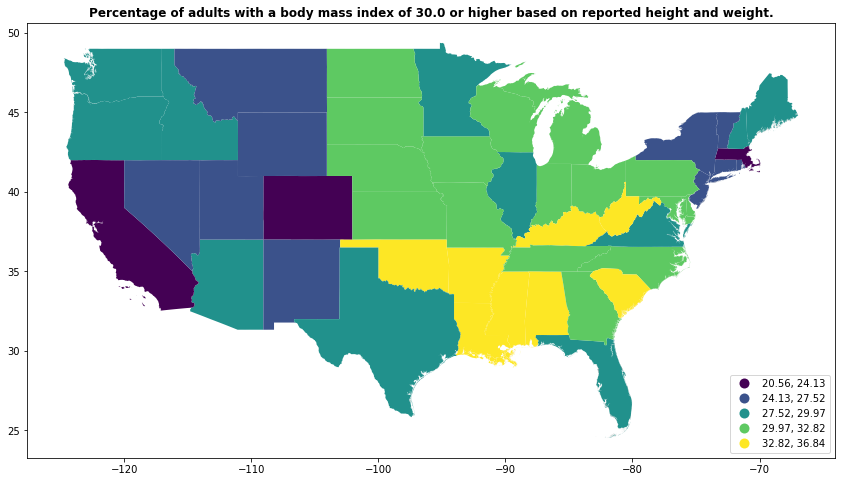

In [ ]:
fig,ax =plt.subplots(figsize=(18,8))
ax.set_title("Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.",fontsize=12, fontweight='bold');
usa.plot(ax=ax, column='Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.', scheme='fisherjenks', k=5, legend=True, legend_kwds={'loc': 'lower right'});


##At least one two sample test


In [ ]:
x_mean = usa.geometry.centroid.x.mean()
East = usa.loc[usa.geometry.centroid.x>=x_mean]
West = usa[~usa.NAME.isin(East.NAME)]
print(East.shape)
print(West.shape)


<ipython-input-19-7d10fcc9f1c8>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_mean = usa.geometry.centroid.x.mean()
<ipython-input-19-7d10fcc9f1c8>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  East = usa.loc[usa.geometry.centroid.x>=x_mean]


(26, 18)
(13, 18)


In [ ]:
ttest(East["Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight."], West["Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight."])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.985262,22.633513,two-sided,0.334911,"[-1.36, 3.83]",0.34286,0.475,0.165995


### Two Sample Test Interpretation
*   In the two sample test, the null hypothesis is that the the mean percentage of adults with a body mass index of 30.0 or higher based on reported height and weight in eastern and western states are equal
*   In the two sample test, the null hypothesis is that the the population means are not equal
*   The p-value from the two sample test is 0.334911
*   Because the p-value is not less than 0.05, we fail to reject the null hypothesis.
*   We are 95% confident that there is no difference in the mean percentage of adults with a body mass index of 30.0 or higher based on reported height and weight in eastern and western states 

##Morans I

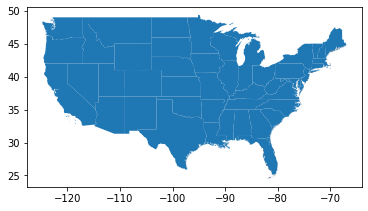

In [ ]:
usa.plot()

In [ ]:
w = weights.Queen.from_dataframe(usa)
w.transform = "R"
y = usa["Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight."]

In [ ]:

moran = Moran(y, w)
print("Moran's I:", moran.I)
print("Moran's p-val:", moran.p_sim)


Moran's I: 0.5302262629265124
Moran's p-val: 0.001


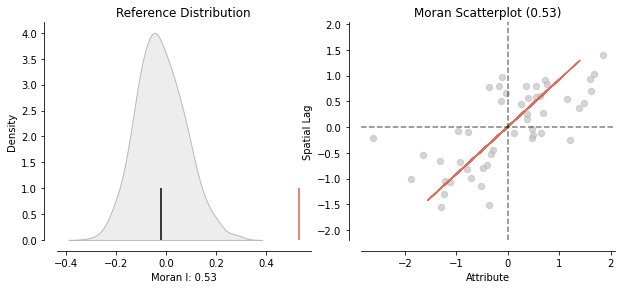

In [ ]:
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

### Moran's *I* Interpretation
*   Moran's *I* Null Hypothesis: Complete spatial randonmness 
*   Moran's *I* Alternative Hypothesis: The data is not spatially random (clustering)
*   p-val = 0.001
*  At a=0.05 we reject the null hypothesis since p < a
*   Since the p value of the percentage with adults with a bodymass index of 30 or higher is less than a, we are 95% condident that the percentage with adults with a bodymass index of 30 or higher
*  Moran's *I* = 0.5302262629265124 meaning that similar values cluster together

##LISA Cluster

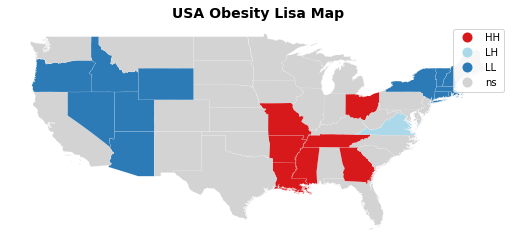

In [ ]:
w.transform = "R"

y = usa["Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight."]

moran_loc = Moran_Local(y, w)

lisa_cluster(moran_loc, usa, p=0.05, figsize = (9,9))
plt.title("USA Obesity Lisa Map",fontweight='bold', fontsize=14)
plt.show()

### LISA Cluster Interpretation
*   Map shows statistically significant clusters of obesity hotspots, coldspots and outliers
*   The hotspots (shown in red) are areas which have values of the percentage of adults with a BMI of 30 higher than the average
*   The coldspots (shown in dark blue) are areas which have values  of the percentage of adults with a BMI of 30 lower than the average
*   The outliers are clusters of Low-High spatial association (shown in light blue) where the values of the percentage of adults with a BMI of 30 is lower than the average but neighboring areas where the valyue of the percentage of adults with a BMI of 30 is higher than the average
*   The hotspots are found in the South West
*   There are 2 statistically significant low-high clusters which are found bordering the hotspots
*   There are 2 main groups of coldspots. One is found in the North-East and on is found in the West





##Clustering Partitioning

In [ ]:
usa['obesity']=usa['Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.']
usa["education"]=usa["Completed at Least Bachelor's Degree (% of adults ages 25 and older)"]
usa["Median_Personal_Earnings"]=usa["Median Personal Earnings ($)"]
usa["Median_Household_Income"]=usa["Median Household Income ($)"]
usa["foodinsecure"]=usa["Percentage of the population that did not have access to a reliable source of food during the past year."]
usa["supermarket"]=usa["Prevalence of supermarkets, grocery stores, and produce stands (NAICS codes 445110 and 445230) per 10,000 residents."]
usa["diabetes"]=usa["Percentage of adults 18 and older who have ever been told by a doctor that they have diabetes."]
usa["physicalactivity"]=usa["Percentage of adults age 20 and over reporting no leisuren/atime physical activity."]

In [ ]:
usa.reset_index(inplace = True,drop = True)

###Demographic

In [ ]:
predictors = ["education",'Median_Personal_Earnings','Median_Household_Income', 'foodinsecure','supermarket','diabetes','physicalactivity']

In [ ]:
db_scaled = robust_scale(usa[predictors])

In [ ]:
from libpysal.weights import Queen, KNN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import robust_scale

In [ ]:
from sklearn.preprocessing import robust_scale

db_scaled = robust_scale(usa[predictors])

In [ ]:
sse = []
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(db_scaled)
    sse.append(kmeans.inertia_)

In [ ]:
!pip install --upgrade kneed
from kneed import KneeLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


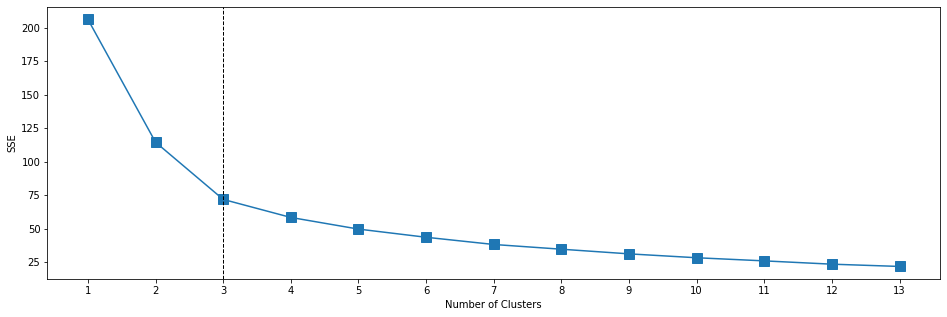

In [ ]:
kl = KneeLocator(range(1, 14), sse, curve="convex", direction="decreasing")
f,ax=plt.subplots(figsize=(16,5))
ax.plot(range(1, 14), sse, 's-', markersize=10)
ax.axvline(x=kl.elbow, color='k', linestyle='dashed', lw=1)
ax.set_xticks(range(1, 14))
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("SSE")
plt.show()

In [ ]:

from sklearn.metrics import silhouette_score
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 14):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(db_scaled)
    score = silhouette_score(db_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

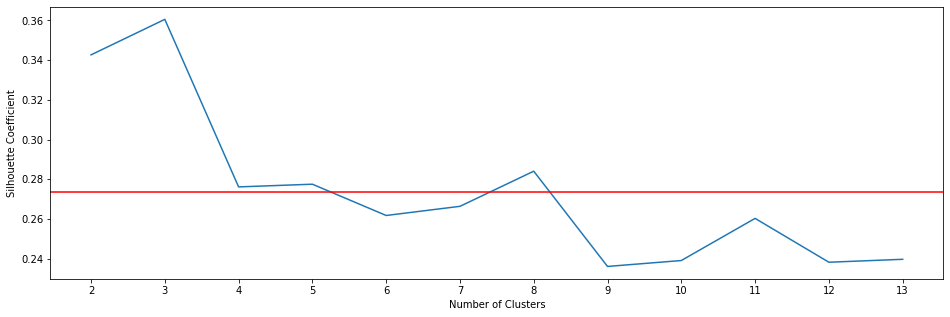

In [ ]:
#########################
f,ax = plt.subplots(figsize=(16,5))
plt.plot(range(2, 14), silhouette_coefficients)
ax.set_xticks(range(2, 14))
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Coefficient")
import matplotlib.pyplot as plt
mean=sum(silhouette_coefficients)/len(silhouette_coefficients)
plt.axhline(y=mean, color='r', linestyle='-')
plt.show()

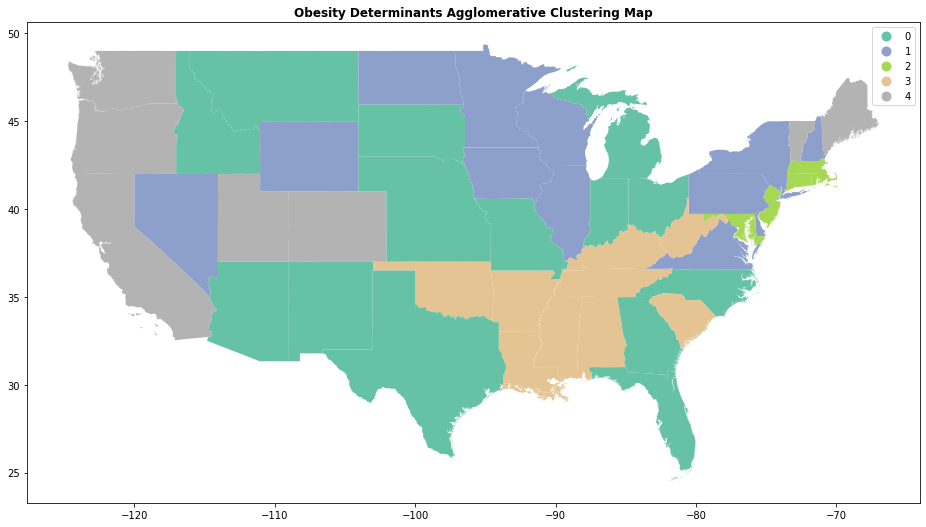

In [ ]:
from sklearn.cluster import AgglomerativeClustering

np.random.seed(0)

model = AgglomerativeClustering(linkage="ward", n_clusters=5)

model.fit(db_scaled)

usa["ward5"] = model.labels_

usa["ward5"] = model.labels_


f, axs = plt.subplots(figsize=(16, 10))

plt.title("Obesity Determinants Agglomerative Clustering Map",fontweight='bold', fontsize=12)

usa.plot(
    column="ward5",
    categorical=True,
    cmap="Set2",
    legend=True,
    linewidth=0,
    ax=axs,
);

### Agglomerative Clustering Interpretation
*   Clusters are formed based on distance and similarity in the percentage of adults reporting no lesiure time/physical activity and the median household income 
*   Agglomerative Clustering reveals that most of the hotspot states (those with High-High spatial association) are grouped into the same cluster 
*   Agglomerative Clustering reveals that most of the coldspots states (those with Low-Low spatial associatiob) are grouped into the same cluster 
*   Agglomerative Clustering suggests that the spatial distribution of hotspots and coldspots and be explained by the spatial distribution of the percentage of adults reporting no lesiure time/physical activity and the median household income



# Regression - State Level

## kitchen sink (all variables)

In [ ]:
import pandas as pd 
import geopandas as gpd 
import numpy as np 
from libpysal.examples import available
from pysal.model import spreg
from pysal.lib import weights
from pysal.explore import esda

from scipy import stats
import statsmodels.formula.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import contextily as cx

/usr/local/lib/python3.8/dist-packages/spaghetti/network.py:39: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [ ]:
usa['supermarket prevalence']=usa['Prevalence of supermarkets, grocery stores, and produce stands (NAICS codes 445110 and 445230) per 10,000 residents.']
usa['food insecurity'] = usa['Percentage of the population that did not have access to a reliable source of food during the past year.']
usa['no physical activity']=usa['Percentage of adults age 20 and over reporting no leisuren/atime physical activity.']
usa['adult diabetes']=usa['Percentage of adults 18 and older who have ever been told by a doctor that they have diabetes.']
usa['obesity']=usa['Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.']
usa['at least a bachelors degree']=usa["Completed at Least Bachelor's Degree (% of adults ages 25 and older)"]

In [ ]:
variables = ['food insecurity','no physical activity','adult diabetes','at least a bachelors degree', 'Median Personal Earnings ($)','Median Household Income ($)']

In [ ]:
kitchensink = spreg.OLS(usa[['obesity']].values, usa[variables].values, 
                  name_y = 'obesity', name_x = variables)

In [ ]:
print(kitchensink.summary) 

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     obesity                Number of Observations:          48
Mean dependent var  :     30.0939                Number of Variables   :           7
S.D. dependent var  :      3.6738                Degrees of Freedom    :          41
R-squared           :      0.8810
Adjusted R-squared  :      0.8636
Sum squared residual:      75.468                F-statistic           :     50.6046
Sigma-square        :       1.841                Prob(F-statistic)     :   2.116e-17
S.E. of regression  :       1.357                Log likelihood        :     -78.969
Sigma-square ML     :       1.572                Akaike info criterion :     171.938
S.E of regression ML:      1.2539                Schwarz criterion     :     185.037

-----------------------------------------------------------------------------

## m2 (an OLS model where insignificant predictors are dropped)

In [ ]:
m2_variables = ['no physical activity','adult diabetes']

In [ ]:
m2 = spreg.OLS(usa[['obesity']].values, usa[m2_variables].values, 
                  name_y = 'obesity', name_x = m2_variables)

In [ ]:
print(m2.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     obesity                Number of Observations:          48
Mean dependent var  :     30.0939                Number of Variables   :           3
S.D. dependent var  :      3.6738                Degrees of Freedom    :          45
R-squared           :      0.8296
Adjusted R-squared  :      0.8220
Sum squared residual:     108.097                F-statistic           :    109.5373
Sigma-square        :       2.402                Prob(F-statistic)     :    5.11e-18
S.E. of regression  :       1.550                Log likelihood        :     -87.593
Sigma-square ML     :       2.252                Akaike info criterion :     181.186
S.E of regression ML:      1.5007                Schwarz criterion     :     186.799

-----------------------------------------------------------------------------

## spatial model (either fixed effect, spatial regimes, SLX, spatial error, or spatial lag)

In [ ]:
w = weights.KNN.from_dataframe(usa, k=8)
w.transform = 'R'
w

In [ ]:


m4 = spreg.GM_Error_Het(
    # Dependent variable
    usa[["obesity"]].values,
    # Independent variables
    usa[variables].values,
    # Spatial weights matrix
    w=w,
    # Dependent variable name
    name_y="obesity",
    # Independent variables names
    name_x=variables,
)



In [ ]:
print(m4.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED LEAST SQUARES (HET)
---------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     obesity                Number of Observations:          48
Mean dependent var  :     30.0939                Number of Variables   :           7
S.D. dependent var  :      3.6738                Degrees of Freedom    :          41
Pseudo R-squared    :      0.8798
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT      19.6146761       3.6398206       5.3889129       0.0000001
     food insecurity      -0.3053459       0.1233031      -2.4763852       0.01

## Spatial model on significant variables

In [ ]:
################################
glob_m = esda.Moran(usa.obesity, w)
print(glob_m.I, glob_m.p_sim)

0.5466449755073228 0.001


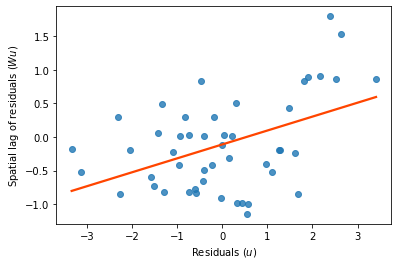

In [ ]:
lag_residual = weights.spatial_lag.lag_spatial(w, m2.u)
ax = sns.regplot(
    m2.u.flatten(),
    lag_residual.flatten(),
    line_kws=dict(color="orangered"),
    ci=None,
)
ax.set_xlabel("Residuals ($u$)")
ax.set_ylabel("Spatial lag of residuals ($Wu$)");

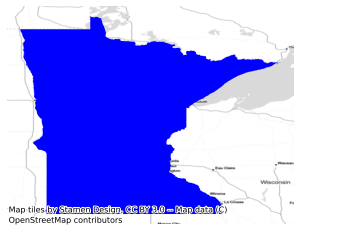

In [ ]:
# Re-weight W to 10 nearest neighbors
w.reweight(k=10, inplace=True)
# Row standardise weights
w.transform = "R"
# Run LISA on residuals
outliers = esda.moran.Moran_Local(m2.u, w, permutations=9999)
# Select only LISA cluster cores
error_clusters = outliers.q % 2 == 1
# Filter out non-significant clusters
error_clusters &= outliers.p_sim <= 0.001
# Add `error_clusters` and `local_I` columns
ax = (
    usa.assign(
        error_clusters=error_clusters,
        local_I=outliers.Is
        # Retain error clusters only
    )
    .query(
        "error_clusters"
        # Sort by I value to largest plot on top
    )
    .sort_values(
        "local_I"
        # Plot I values
    )
    .plot("local_I", cmap="bwr", marker=".")
)
# Add basemap
cx.add_basemap(ax, crs = usa.crs.to_string(), source=cx.providers.Stamen.TonerLite)
# Remove axes
ax.set_axis_off();

In [ ]:
m5 = spreg.GM_Error_Het(
    # Dependent variable
    usa[["obesity"]].values,
    # Independent variables
    usa[m2_variables].values,
    # Spatial weights matrix
    w=w,
    # Dependent variable name
    name_y="obesity",
    # Independent variables names
    name_x=m2_variables,
)

In [ ]:
print(m5.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED LEAST SQUARES (HET)
---------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     obesity                Number of Observations:          48
Mean dependent var  :     30.0939                Number of Variables   :           3
S.D. dependent var  :      3.6738                Degrees of Freedom    :          45
Pseudo R-squared    :      0.8225
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT      10.1780620       2.4606923       4.1362596       0.0000353
no physical activity       0.2469766       0.1058849       2.3324992       0.01

# County Level

### Add and Format Data

In [ ]:
countydata=pd.read_excel('/content/USACOUNTIES.xlsx')

In [ ]:
countydata['COUNTY']=countydata['COUNTY'].astype('string')

In [ ]:
countydata['STATE_ABBR']=countydata['COUNTY'].str[-2:]

In [ ]:
countydata=countydata.dropna()
countydata= countydata.loc[
                            (countydata.STATE_ABBR != "AK") &
                            (countydata.STATE_ABBR != "HI") #&
                            #(countydata.STATE_ABBR != "DC")
                            ]

In [ ]:
countydata['COUNTY']=countydata['COUNTY'].str[:-4]

In [ ]:
countydata.head()

,COUNTY,"Prevalence of supermarkets, grocery stores, and produce stands (NAICS codes 445110 and 445230) per 10,000 residents.",Percentage of the population that did not have access to a reliable source of food during the past year.,Percentage of adults age 20 and over reporting no leisuren/atime physical activity.,Percentage of adults 18 and older who have ever been told by a doctor that they have diabetes.,Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.,Median Personal Earnings ($),Gini Coefficient of Income Inequality 0 (complete equality) to 1 (complete inequality).,Median Household Income ($),Completed at Least Bachelor's Degree (% of adults ages 25 and older),STATE_ABBR
0,Autauga County,1.601806,14.4,28.6,13.0,34.1,30760.0,0.4227,51281.0,23.2,AL
1,Baldwin County,1.040958,13.7,22.3,10.4,27.4,27557.0,0.4564,50254.0,29.0,AL
2,Barbour County,1.971982,23.3,31.8,18.4,44.4,22369.0,0.4642,32964.0,12.5,AL
3,Bibb County,2.883625,16.4,33.9,14.8,40.3,25968.0,0.4410,38678.0,10.6,AL
4,Blount County,1.402884,12.2,28.0,14.1,34.6,30838.0,0.4037,45813.0,12.9,AL


In [ ]:
county=gpd.read_file('/content/USAcounties.shp')

In [ ]:
county.head()

,NAME,STATE_NAME,STATE_ABBR,STATE_FIPS,COUNTY_FIP,FIPS,POPULATION,POP_SQMI,SQMI,geometry
0,Autauga County,Alabama,AL,01,001,01001,58805,97.3,604.37,"POLYGON ((-86.41312 32.70739, -86.41300 32.678..."
1,Baldwin County,Alabama,AL,01,003,01003,231767,141.9,1633.14,"MULTIPOLYGON (((-87.56491 30.28162, -87.56470 ..."
2,Barbour County,Alabama,AL,01,005,01005,25223,27.9,904.52,"POLYGON ((-85.25784 32.14794, -85.25851 32.146..."
3,Bibb County,Alabama,AL,01,007,01007,22293,35.6,626.17,"POLYGON ((-87.06574 33.24691, -87.06477 33.246..."
4,Blount County,Alabama,AL,01,009,01009,59134,90.9,650.63,"POLYGON ((-86.45302 34.25932, -86.45288 34.259..."


In [ ]:
county=county.dropna()
county= county.loc[
                            (county.STATE_ABBR != "AK") &
                            (county.STATE_ABBR != "HI") #&
                            #(county.STATE_ABBR != "DC")
                            ]

In [ ]:
usacounty=pd.merge(county,countydata,left_on='NAME',right_on='COUNTY', how='left')
usacounty.head()

,NAME,STATE_NAME,STATE_ABBR_x,STATE_FIPS,COUNTY_FIP,FIPS,POPULATION,POP_SQMI,SQMI,geometry,...,"Prevalence of supermarkets, grocery stores, and produce stands (NAICS codes 445110 and 445230) per 10,000 residents.",Percentage of the population that did not have access to a reliable source of food during the past year.,Percentage of adults age 20 and over reporting no leisuren/atime physical activity.,Percentage of adults 18 and older who have ever been told by a doctor that they have diabetes.,Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.,Median Personal Earnings ($),Gini Coefficient of Income Inequality 0 (complete equality) to 1 (complete inequality).,Median Household Income ($),Completed at Least Bachelor's Degree (% of adults ages 25 and older),STATE_ABBR_y
0,Autauga County,Alabama,AL,01,001,01001,58805,97.3,604.37,"POLYGON ((-86.41312 32.70739, -86.41300 32.678...",...,1.601806,14.4,28.6,13.0,34.1,30760.0,0.4227,51281.0,23.2,AL
1,Baldwin County,Alabama,AL,01,003,01003,231767,141.9,1633.14,"MULTIPOLYGON (((-87.56491 30.28162, -87.56470 ...",...,1.040958,13.7,22.3,10.4,27.4,27557.0,0.4564,50254.0,29.0,AL
2,Baldwin County,Alabama,AL,01,003,01003,231767,141.9,1633.14,"MULTIPOLYGON (((-87.56491 30.28162, -87.56470 ...",...,1.840495,23.9,23.5,14.0,36.8,21120.0,0.5169,32460.0,17.7,GA
3,Barbour County,Alabama,AL,01,005,01005,25223,27.9,904.52,"POLYGON ((-85.25784 32.14794, -85.25851 32.146...",...,1.971982,23.3,31.8,18.4,44.4,22369.0,0.4642,32964.0,12.5,AL
4,Barbour County,Alabama,AL,01,005,01005,25223,27.9,904.52,"POLYGON ((-85.25784 32.14794, -85.25851 32.146...",...,2.336065,14.9,32.5,15.3,37.6,21781.0,0.4358,37066.0,11.9,WV


In [ ]:
usacounty.dropna()

,NAME,STATE_NAME,STATE_ABBR_x,STATE_FIPS,COUNTY_FIP,FIPS,POPULATION,POP_SQMI,SQMI,geometry,...,"Prevalence of supermarkets, grocery stores, and produce stands (NAICS codes 445110 and 445230) per 10,000 residents.",Percentage of the population that did not have access to a reliable source of food during the past year.,Percentage of adults age 20 and over reporting no leisuren/atime physical activity.,Percentage of adults 18 and older who have ever been told by a doctor that they have diabetes.,Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.,Median Personal Earnings ($),Gini Coefficient of Income Inequality 0 (complete equality) to 1 (complete inequality).,Median Household Income ($),Completed at Least Bachelor's Degree (% of adults ages 25 and older),STATE_ABBR_y
0,Autauga County,Alabama,AL,01,001,01001,58805,97.3,604.37,"POLYGON ((-86.41312 32.70739, -86.41300 32.678...",...,1.601806,14.4,28.6,13.0,34.1,30760.0,0.4227,51281.0,23.2,AL
1,Baldwin County,Alabama,AL,01,003,01003,231767,141.9,1633.14,"MULTIPOLYGON (((-87.56491 30.28162, -87.56470 ...",...,1.040958,13.7,22.3,10.4,27.4,27557.0,0.4564,50254.0,29.0,AL
2,Baldwin County,Alabama,AL,01,003,01003,231767,141.9,1633.14,"MULTIPOLYGON (((-87.56491 30.28162, -87.56470 ...",...,1.840495,23.9,23.5,14.0,36.8,21120.0,0.5169,32460.0,17.7,GA
3,Barbour County,Alabama,AL,01,005,01005,25223,27.9,904.52,"POLYGON ((-85.25784 32.14794, -85.25851 32.146...",...,1.971982,23.3,31.8,18.4,44.4,22369.0,0.4642,32964.0,12.5,AL
4,Barbour County,Alabama,AL,01,005,01005,25223,27.9,904.52,"POLYGON ((-85.25784 32.14794, -85.25851 32.146...",...,2.336065,14.9,32.5,15.3,37.6,21781.0,0.4358,37066.0,11.9,WV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14346,Teton County,Wyoming,WY,56,039,56039,23331,5.5,4217.26,"POLYGON ((-110.66788 44.66630, -110.66736 44.6...",...,2.160459,11.8,24.0,8.8,26.7,25140.0,0.4140,46360.0,23.3,MT
14347,Teton County,Wyoming,WY,56,039,56039,23331,5.5,4217.26,"POLYGON ((-110.66788 44.66630, -110.66736 44.6...",...,2.868946,11.7,10.8,4.8,12.7,31132.0,0.4728,75325.0,53.9,WY
14348,Uinta County,Wyoming,WY,56,041,56041,20450,9.8,2088.15,"POLYGON ((-110.96532 41.57946, -110.92455 41.5...",...,2.844982,13.1,21.5,9.0,27.9,26899.0,0.4289,56569.0,19.3,WY
14349,Washakie County,Wyoming,WY,56,043,56043,7685,3.4,2242.69,"POLYGON ((-108.54727 44.16848, -108.54435 44.1...",...,3.430345,12.6,24.4,12.0,27.7,30342.0,0.4536,47652.0,21.1,WY


In [ ]:
usacounty['obesity']=usacounty['Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.']
usacounty["education"]=usacounty["Completed at Least Bachelor's Degree (% of adults ages 25 and older)"]
usacounty["Median_Personal_Earnings"]=usacounty["Median Personal Earnings ($)"]
usacounty["Median_Household_Income"]=usacounty["Median Household Income ($)"]
usacounty["foodinsecure"]=usacounty["Percentage of the population that did not have access to a reliable source of food during the past year."]
usacounty["supermarket"]=usacounty["Prevalence of supermarkets, grocery stores, and produce stands (NAICS codes 445110 and 445230) per 10,000 residents."]
usacounty["diabetes"]=usacounty["Percentage of adults 18 and older who have ever been told by a doctor that they have diabetes."]
usacounty["physicalactivity"]=usacounty["Percentage of adults age 20 and over reporting no leisuren/atime physical activity."]

## Histograms

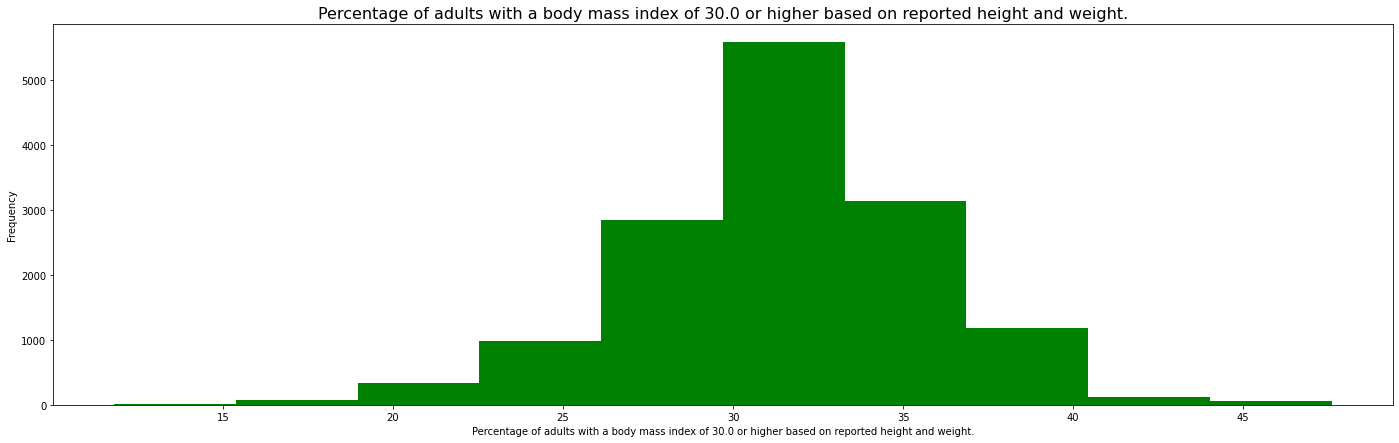

In [ ]:
fig, ax = plt.subplots(figsize=(24,7))
usacounty['obesity'].plot(kind='hist', color='green')
ax.set_title('Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.', fontsize=16)
ax.set_ylabel('Frequency');
ax.set_xlabel('Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.');


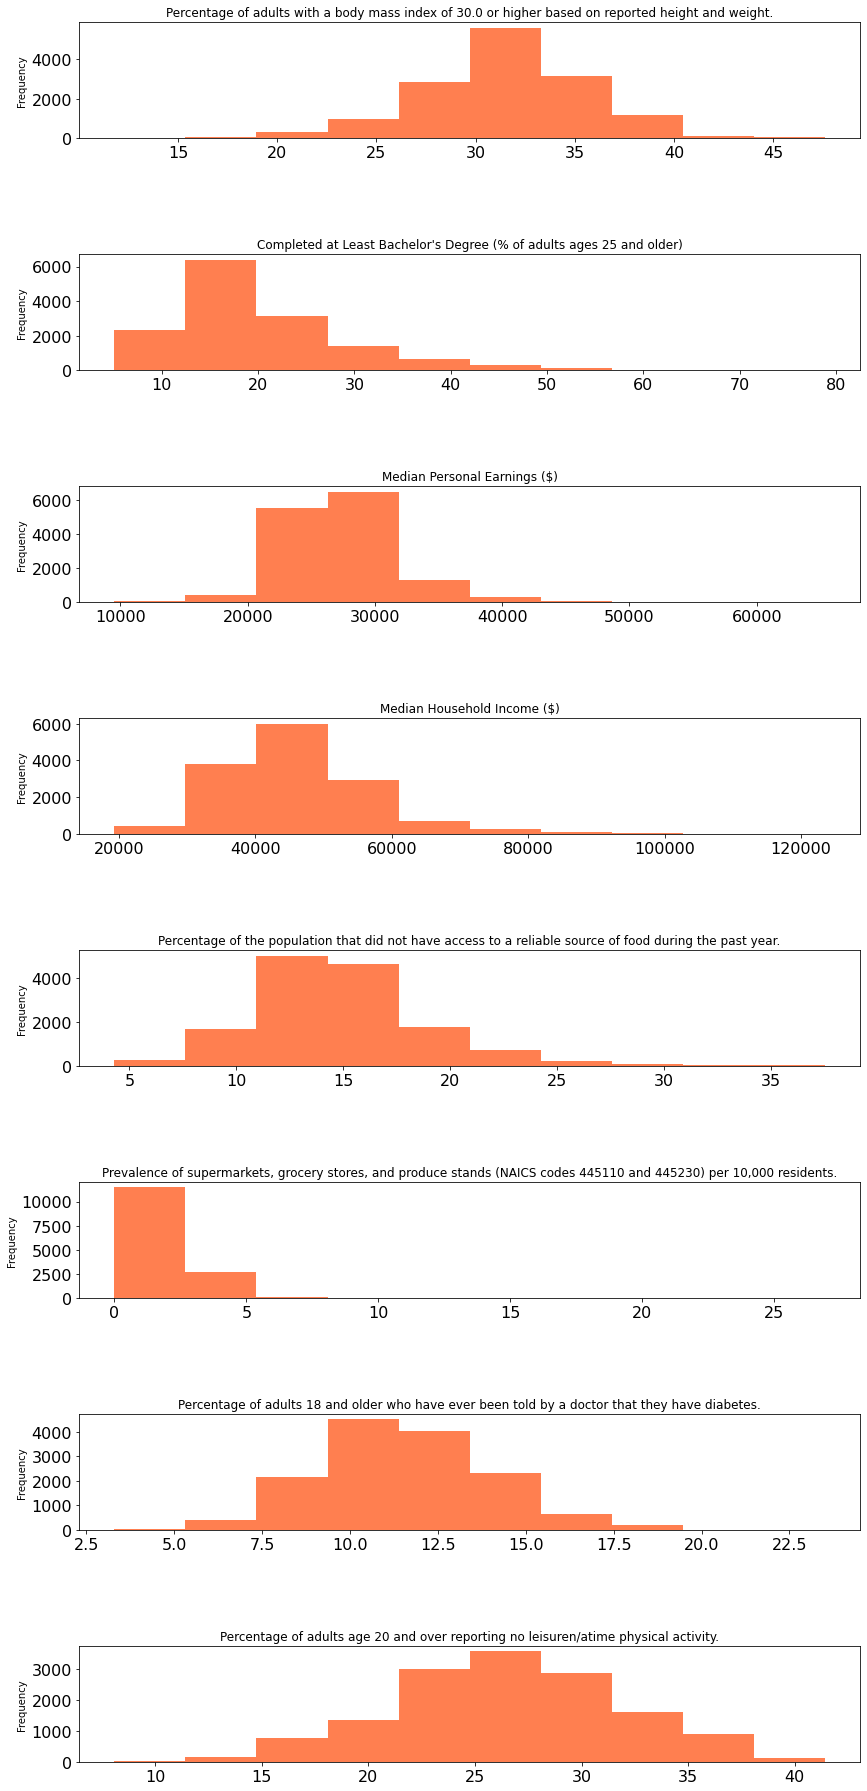

In [ ]:
fig, (ax1, ax2, ax3, ax4,ax5,ax6,ax7,ax8) = plt.subplots(8,1, figsize=(14,32))

plt.subplots_adjust(hspace=1)

usacounty.obesity.plot(ax=ax1, kind='hist',title='Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.', fontsize=16, color='coral')
usacounty.education.plot(ax=ax2, kind='hist',title="Completed at Least Bachelor's Degree (% of adults ages 25 and older)", fontsize=16, color='coral')
usacounty.Median_Personal_Earnings.plot(ax=ax3, kind='hist',title='Median Personal Earnings ($)', fontsize=16, color='coral')
usacounty.Median_Household_Income.plot(ax=ax4, kind='hist',title='Median Household Income ($)', fontsize=16, color='coral')
usacounty.foodinsecure.plot(ax=ax5, kind='hist',title='Percentage of the population that did not have access to a reliable source of food during the past year.', fontsize=16, color='coral')
usacounty.supermarket.plot(ax=ax6, kind='hist',title='Prevalence of supermarkets, grocery stores, and produce stands (NAICS codes 445110 and 445230) per 10,000 residents.', fontsize=16, color='coral')
usacounty.diabetes.plot(ax=ax7, kind='hist',title='Percentage of adults 18 and older who have ever been told by a doctor that they have diabetes.', fontsize=16, color='coral')
usacounty.physicalactivity.plot(ax=ax8, kind='hist',title='Percentage of adults age 20 and over reporting no leisuren/atime physical activity.', fontsize=16, color='coral')

## Statistical testing - county

In [ ]:
usacounty.reset_index()

,index,NAME,STATE_NAME,STATE_ABBR_x,STATE_FIPS,COUNTY_FIP,FIPS,POPULATION,POP_SQMI,SQMI,...,Completed at Least Bachelor's Degree (% of adults ages 25 and older),STATE_ABBR_y,obesity,education,Median_Personal_Earnings,Median_Household_Income,foodinsecure,supermarket,diabetes,physicalactivity
0,0,Autauga County,Alabama,AL,01,001,01001,58805,97.3,604.37,...,23.2,AL,34.1,23.2,30760.0,51281.0,14.4,1.601806,13.0,28.6
1,1,Baldwin County,Alabama,AL,01,003,01003,231767,141.9,1633.14,...,29.0,AL,27.4,29.0,27557.0,50254.0,13.7,1.040958,10.4,22.3
2,2,Baldwin County,Alabama,AL,01,003,01003,231767,141.9,1633.14,...,17.7,GA,36.8,17.7,21120.0,32460.0,23.9,1.840495,14.0,23.5
3,3,Barbour County,Alabama,AL,01,005,01005,25223,27.9,904.52,...,12.5,AL,44.4,12.5,22369.0,32964.0,23.3,1.971982,18.4,31.8
4,4,Barbour County,Alabama,AL,01,005,01005,25223,27.9,904.52,...,11.9,WV,37.6,11.9,21781.0,37066.0,14.9,2.336065,15.3,32.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14346,14346,Teton County,Wyoming,WY,56,039,56039,23331,5.5,4217.26,...,23.3,MT,26.7,23.3,25140.0,46360.0,11.8,2.160459,8.8,24.0
14347,14347,Teton County,Wyoming,WY,56,039,56039,23331,5.5,4217.26,...,53.9,WY,12.7,53.9,31132.0,75325.0,11.7,2.868946,4.8,10.8
14348,14348,Uinta County,Wyoming,WY,56,041,56041,20450,9.8,2088.15,...,19.3,WY,27.9,19.3,26899.0,56569.0,13.1,2.844982,9.0,21.5
14349,14349,Washakie County,Wyoming,WY,56,043,56043,7685,3.4,2242.69,...,21.1,WY,27.7,21.1,30342.0,47652.0,12.6,3.430345,12.0,24.4


In [ ]:
usacounty["Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight."].mean()

31.46830341552001

In [ ]:
stats.ttest_1samp(usacounty["Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight."].dropna(),popmean=31.468303415520012)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [ ]:
usacounty.anova(dv='Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.', between="STATE_NAME", detailed=True, effsize='n2')

,Source,SS,DF,MS,F,p-unc,n2
0,STATE_NAME,14939.37624,47,317.859069,19.087271,2.847388e-152,0.059152
1,Within,237620.71985,14269,16.652934,NaN,NaN,NaN


In [ ]:
r = usacounty[['Percentage of adults age 20 and over reporting no leisuren/atime physical activity.','Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.']].corr()['Percentage of adults age 20 and over reporting no leisuren/atime physical activity.']['Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.']
print('Correlation coefficent is', r)


Correlation coefficent is 0.6862919580541705


In [ ]:
r = usacounty[['Median Household Income ($)','Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.']].corr()['Median Household Income ($)']['Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.']

print('R squared is', r*r)

R squared is 0.22978408676476939


In [ ]:
x_mean = usa.geometry.centroid.x.mean()
East = usacounty.loc[usacounty.geometry.centroid.x>=x_mean]
West = usacounty[~usacounty.NAME.isin(East.NAME)]
print(East.shape)
print(West.shape)


(8696, 29)
(1288, 29)


In [ ]:
y_mean = usa.geometry.centroid.y.mean()
North = usacounty.loc[usacounty.geometry.centroid.y>=y_mean]
South = usacounty[~usacounty.NAME.isin(North.NAME)]
print(South.shape)
print(North.shape)

(1544, 29)
(5880, 29)


In [ ]:
ttest(South["Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight."], North["Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight."])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.766828,2142.154879,two-sided,0.00017,"[0.24, 0.77]",0.117905,37.996,0.983553


In [ ]:
ttest(East["Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight."], West["Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight."])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,15.390587,1544.692678,two-sided,7.761218e-50,"[1.89, 2.44]",0.518956,1.637e+49,1.0


## Choropleth Mapping

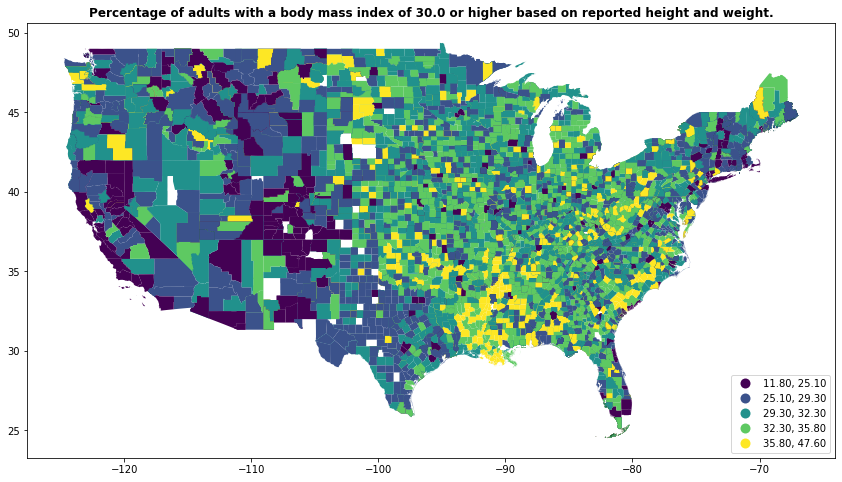

In [ ]:
fig,ax =plt.subplots(figsize=(18,8))
ax.set_title("Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.",fontsize=12, fontweight='bold');
usacounty.plot(ax=ax, column='Percentage of adults with a body mass index of 30.0 or higher based on reported height and weight.', scheme='fisherjenks', k=5, legend=True, legend_kwds={'loc': 'lower right'});


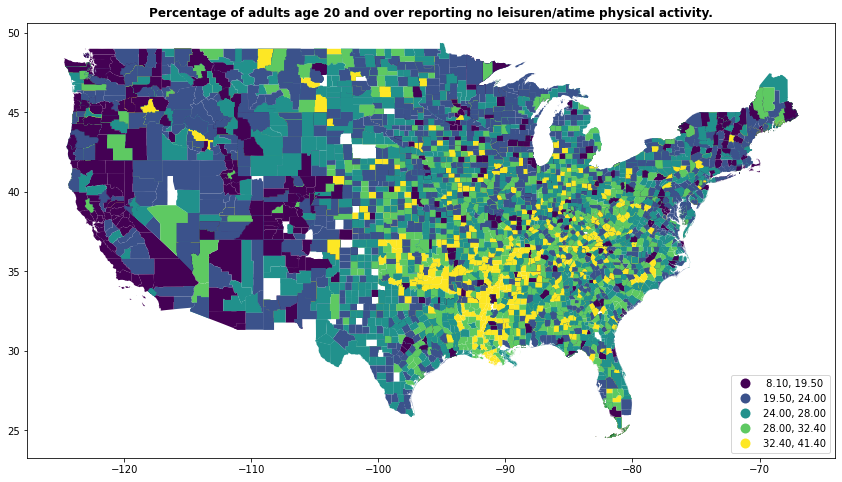

In [ ]:
fig,ax =plt.subplots(figsize=(18,8))
ax.set_title("Percentage of adults age 20 and over reporting no leisuren/atime physical activity.",fontsize=12, fontweight='bold');
usacounty.plot(ax=ax, column="Percentage of adults age 20 and over reporting no leisuren/atime physical activity.", scheme='fisherjenks', k=5, legend=True, legend_kwds={'loc': 'lower right'});


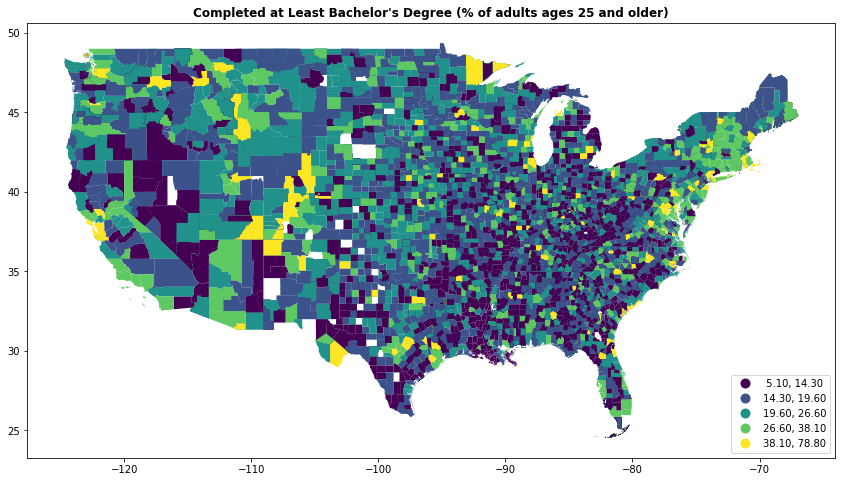

In [ ]:
fig,ax =plt.subplots(figsize=(18,8))
ax.set_title("Completed at Least Bachelor's Degree (% of adults ages 25 and older)",fontsize=12, fontweight='bold');
usacounty.plot(ax=ax, column="Completed at Least Bachelor's Degree (% of adults ages 25 and older)", scheme='fisherjenks', k=5, legend=True, legend_kwds={'loc': 'lower right'});


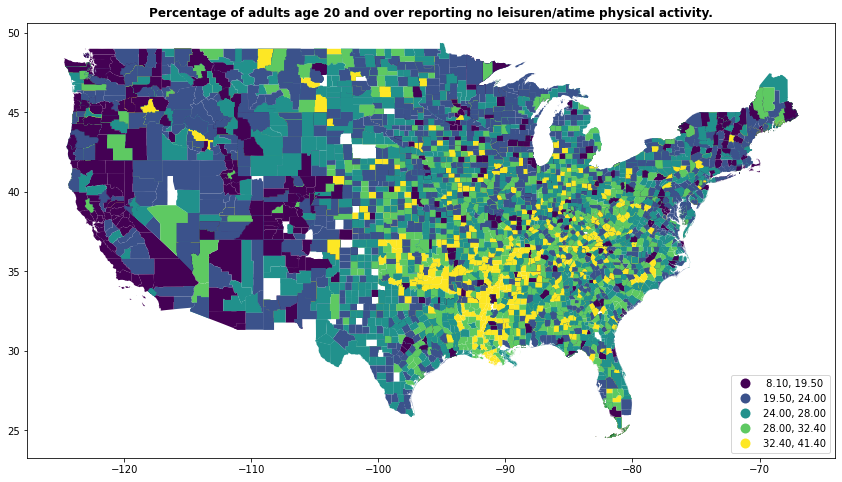

In [ ]:
fig,ax =plt.subplots(figsize=(18,8))
ax.set_title("Percentage of adults age 20 and over reporting no leisuren/atime physical activity.",fontsize=12, fontweight='bold');
usacounty.plot(ax=ax, column="Percentage of adults age 20 and over reporting no leisuren/atime physical activity.", scheme='fisherjenks', k=5, legend=True, legend_kwds={'loc': 'lower right'});


## Regression - County Level

### Kitchen Sink

In [ ]:
variables = ['education','Median_Personal_Earnings','Median_Household_Income', 'foodinsecure','supermarket','diabetes','physicalactivity']

In [ ]:
usacounty=usacounty.dropna()

In [ ]:
kitchensink = spreg.OLS(usacounty[['obesity']].values, usacounty[variables].values, 
                  name_y = 'obesity', name_x = variables)

In [ ]:
print(kitchensink.summary) 

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     obesity                Number of Observations:       14317
Mean dependent var  :     31.4683                Number of Variables   :           8
S.D. dependent var  :      4.2002                Degrees of Freedom    :       14309
R-squared           :      0.5631
Adjusted R-squared  :      0.5629
Sum squared residual:  110352.602                F-statistic           :   2634.2146
Sigma-square        :       7.712                Prob(F-statistic)     :           0
S.E. of regression  :       2.777                Log likelihood        :  -34934.268
Sigma-square ML     :       7.708                Akaike info criterion :   69884.537
S.E of regression ML:      2.7763                Schwarz criterion     :   69945.090

-----------------------------------------------------------------------------

### M2 

In [ ]:
m2_variables = ['education','Median_Household_Income', 'foodinsecure','supermarket','diabetes','physicalactivity']

In [ ]:
m2 = spreg.OLS(usacounty["obesity"].values, usacounty[m2_variables].values, 
                  name_y = "obesity", name_x = m2_variables)

In [ ]:
print(m2.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     obesity                Number of Observations:       14317
Mean dependent var  :     31.4683                Number of Variables   :           7
S.D. dependent var  :      4.2002                Degrees of Freedom    :       14310
R-squared           :      0.5631
Adjusted R-squared  :      0.5629
Sum squared residual:  110353.095                F-statistic           :   3073.4408
Sigma-square        :       7.712                Prob(F-statistic)     :           0
S.E. of regression  :       2.777                Log likelihood        :  -34934.300
Sigma-square ML     :       7.708                Akaike info criterion :   69882.601
S.E of regression ML:      2.7763                Schwarz criterion     :   69935.585

-----------------------------------------------------------------------------

###OLS3

In [ ]:
significantvariables = ['education','foodinsecure','supermarket','diabetes','physicalactivity']

In [ ]:
ols3 = spreg.OLS(usacounty["obesity"].values, usacounty[significantvariables].values, 
                  name_y = "obesity", name_x = significantvariables)

In [ ]:
print(ols3.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     obesity                Number of Observations:       14317
Mean dependent var  :     31.4683                Number of Variables   :           6
S.D. dependent var  :      4.2002                Degrees of Freedom    :       14311
R-squared           :      0.5566
Adjusted R-squared  :      0.5564
Sum squared residual:  111996.341                F-statistic           :   3592.2743
Sigma-square        :       7.826                Prob(F-statistic)     :           0
S.E. of regression  :       2.797                Log likelihood        :  -35040.110
Sigma-square ML     :       7.823                Akaike info criterion :   70092.221
S.E of regression ML:      2.7969                Schwarz criterion     :   70137.636

-----------------------------------------------------------------------------

###Global Moran's I

In [ ]:
w = weights.KNN.from_dataframe(usacounty, k=8)
w.transform = 'R'
w

In [ ]:
glob_m = esda.Moran(usacounty['obesity'], w)
print(glob_m.I, glob_m.p_sim)

0.08985221013389698 0.001


### M2 Lag of Residuals Plot

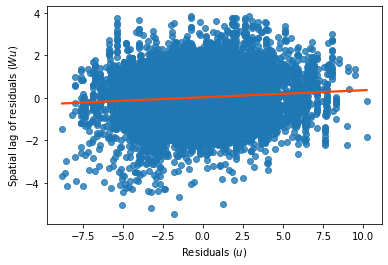

In [ ]:
lag_residual = weights.spatial_lag.lag_spatial(w, m2.u)
ax = sns.regplot(
    m2.u.flatten(),
    lag_residual.flatten(),
    line_kws=dict(color="orangered"),
    ci=None,
)
ax.set_xlabel("Residuals ($u$)")
ax.set_ylabel("Spatial lag of residuals ($Wu$)");

###Local Moran's I

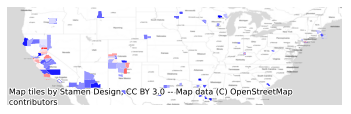

In [ ]:
# Re-weight W to 10 nearest neighbors
w.reweight(k=10, inplace=True)
# Row standardise weights
w.transform = "R"
# Run LISA on residuals
outliers = esda.moran.Moran_Local(m2.u, w, permutations=9999)
# Select only LISA cluster cores
error_clusters = outliers.q % 2 == 1
# Filter out non-significant clusters
error_clusters &= outliers.p_sim <= 0.001
# Add `error_clusters` and `local_I` columns
ax = (
    usacounty.assign(
        error_clusters=error_clusters,
        local_I=outliers.Is
        # Retain error clusters only
    )
    .query(
        "error_clusters"
        # Sort by I value to largest plot on top
    )
    .sort_values(
        "local_I"
        # Plot I values
    )
    .plot("local_I", cmap="bwr", marker=".")
)
# Add basemap
cx.add_basemap(ax, crs = usa.crs.to_string(), source=cx.providers.Stamen.TonerLite)
# Remove axes
ax.set_axis_off();


###Fixed Effect Model

In [ ]:
m3 = spreg.OLS_Regimes(
    # Dependent variable
    usacounty[["obesity"]].values,
    # Independent variables
    usacounty[m2_variables].values,
    # Variable specifying neighborhood membership
    usacounty["STATE_ABBR_x"].tolist(),
    # Allow the constant term to vary by group/regime
    constant_regi="many",
    # Variables to be allowed to vary (True) or kept
    # constant (False). Here we set all to False
    cols2regi=[False] * len(m2_variables),
    # Allow separate sigma coefficients to be estimated
    # by regime (False so a single sigma)
    regime_err_sep=False,
    # Dependent variable name
    name_y="obesity",
    # Independent variables names
    name_x=m2_variables,
)

In [ ]:
print(m3.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES - REGIMES
---------------------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     obesity                Number of Observations:       14317
Mean dependent var  :     31.4683                Number of Variables   :          54
S.D. dependent var  :      4.2002                Degrees of Freedom    :       14263
R-squared           :      0.5760
Adjusted R-squared  :      0.5744
Sum squared residual:  107097.476                F-statistic           :    365.5167
Sigma-square        :       7.509                Prob(F-statistic)     :           0
S.E. of regression  :       2.740                Log likelihood        :  -34719.934
Sigma-square ML     :       7.480                Akaike info criterion :   69547.867
S.E of regression ML:      2.7350                Schwarz criterion     :   69956.604

---------------------------------------------------------

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
f = (
    "obesity ~ "
    + " + ".join(m2_variables)
    + " + STATE_ABBR_x - 1"
)
print(f)

obesity ~ education + Median_Household_Income + foodinsecure + supermarket + diabetes + physicalactivity + STATE_ABBR_x - 1


In [ ]:
m3 = sm.ols(f, data=usacounty).fit()

In [ ]:
import pandas


In [ ]:
sfe_names = [i for i in m3.params.index if "STATE_ABBR_x[" in i]
# Create table
pandas.DataFrame(
    {
        "Coef.": m3.params[sfe_names],
        "Std. Error": m3.bse[sfe_names],
        "P-Value": m3.pvalues[sfe_names],
    }
)

,Coef.,Std. Error,P-Value
STATE_ABBR_x[AL],17.625655,0.350473,0.000000e+00
STATE_ABBR_x[AR],17.716235,0.344640,0.000000e+00
STATE_ABBR_x[AZ],15.350149,0.699253,4.492493e-105
STATE_ABBR_x[CA],14.606861,0.431459,1.007599e-241
STATE_ABBR_x[CO],16.567303,0.358046,0.000000e+00
STATE_ABBR_x[CT],15.907679,0.811089,1.558605e-84
STATE_ABBR_x[DE],17.426650,1.025625,4.070302e-64
STATE_ABBR_x[FL],17.283622,0.353117,0.000000e+00
STATE_ABBR_x[GA],17.398920,0.337882,0.000000e+00
STATE_ABBR_x[IA],17.806721,0.338799,0.000000e+00


In [ ]:
m4 = spreg.OLS_Regimes(
    # Dependent variable
    usacounty[["obesity"]].values,
    # Independent variables
    usacounty[m2_variables].values,
    # Variable specifying neighborhood membership
    usacounty["STATE_ABBR_x"].tolist(),
    # Allow the constant term to vary by group/regime
    constant_regi="many",
    # Variables to be allowed to vary (True) or kept
    # constant (False). Here we set all to False
    cols2regi=[False] * len(m2_variables),
    # Allow separate sigma coefficients to be estimated
    # by regime (False so a single sigma)
    regime_err_sep=False,
    # Dependent variable name
    name_y="obesity",
    # Independent variables names
    name_x=m2_variables,
)

In [ ]:
import numpy

numpy.round(m4.betas.flatten() - m3.params.values, decimals=12)

array([-6.70e-11, -1.42e-10, -5.85e-10, -1.80e-10, -1.04e-10, -7.00e-11,
       -1.52e-10, -1.56e-10, -3.30e-11, -2.86e-10, -7.80e-11, -1.11e-10,
       -1.14e-10, -5.50e-11, -2.14e-10, -7.50e-11, -2.52e-10, -9.50e-11,
       -1.29e-10, -7.10e-11, -2.10e-10, -1.21e-10, -8.60e-11,  6.00e-11,
       -1.93e-10, -1.73e-10, -2.20e-10, -3.30e-11, -2.83e-10, -1.79e-10,
       -1.68e-10, -1.87e-10, -1.41e-10, -2.66e-10, -8.10e-11,  3.30e-11,
       -2.42e-10, -2.64e-10, -1.91e-10,  5.80e-11, -1.23e-10, -1.14e-10,
       -1.94e-10, -2.18e-10, -1.34e-10, -1.94e-10, -2.50e-11, -7.90e-11,
       -2.00e-12,  0.00e+00,  1.00e-12,  1.00e-12,  0.00e+00,  0.00e+00])

In [ ]:
neighborhood_effects = m3.params.filter(like="STATE_ABBR_x")
neighborhood_effects.head()

STATE_ABBR_x[AL]    17.625655
STATE_ABBR_x[AR]    17.716235
STATE_ABBR_x[AZ]    15.350149
STATE_ABBR_x[CA]    14.606861
STATE_ABBR_x[CO]    16.567303
dtype: float64

In [ ]:
import contextily



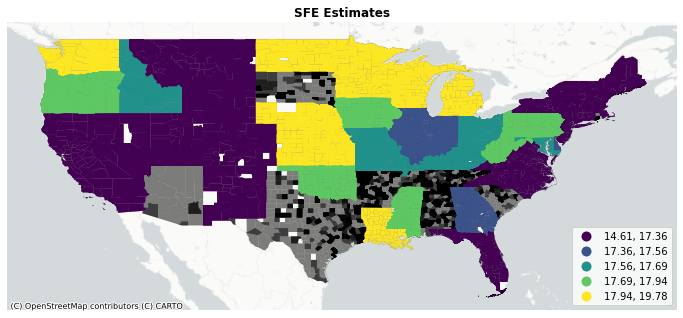

In [ ]:
# Plot base layer with all neighborhoods in grey
ax = usacounty.plot(
    color="k", linewidth=0, alpha=0.5, figsize=(12, 6)
)
# Merge SFE estimates (note not every polygon
# receives an estimate since not every polygon
# contains AirBnb properties)
usacounty.merge(
    neighborhood_effects,
    how="left",
    left_on="STATE_ABBR_x",
    right_index=True
    # Drop polygons without a SFE estimate
).dropna(
    subset=["fixed_effect"]
    # Plot quantile choropleth
).plot(
    "fixed_effect",  # Variable to display
    scheme="quantiles",  # Choropleth scheme
    k=5,  # No. of classes in the choropleth
    linewidth=0.1,  # Polygon border width
    cmap="viridis",  # Color scheme
    ax=ax,  # Axis to draw on
    legend=True,
    legend_kwds={'loc': 'lower right'}
)
# Add basemap
contextily.add_basemap(
    ax,
    crs=usacounty.crs,
    source=contextily.providers.CartoDB.PositronNoLabels,
)
# Remove axis
ax.set_axis_off()
ax.set_title("SFE Estimates",fontsize=12, fontweight='bold');

# Display
plt.show()

### Spatial Error Model

In [ ]:
w = weights.KNN.from_dataframe(usacounty, k=8)
w.transform = 'R'
w


In [ ]:

m4 = spreg.GM_Error_Het(
    # Dependent variable
    usacounty[["obesity"]].values,
    # Independent variables
    usacounty[m2_variables].values,
    # Spatial weights matrix
    w=w,
    # Dependent variable name
    name_y="obesity",
    # Independent variables names
    name_x=m2_variables,
)


In [ ]:
print(m4.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED LEAST SQUARES (HET)
---------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     obesity                Number of Observations:       14317
Mean dependent var  :     31.4683                Number of Variables   :           7
S.D. dependent var  :      4.2002                Degrees of Freedom    :       14310
Pseudo R-squared    :      0.5630
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT      17.5318715       0.3638499      48.1843575       0.0000000
           education      -0.1385865       0.0046935     -29.5272175       0.00

## Correlation Matrix

In [ ]:
var=['education','Median_Personal_Earnings','Median_Household_Income', 'foodinsecure','supermarket','diabetes','physicalactivity','obesity']

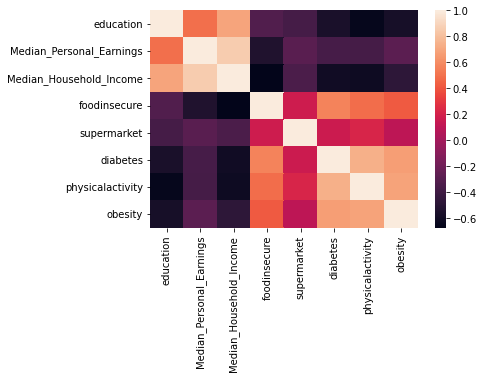

In [ ]:
sns.heatmap(usacounty[var].corr())